# Capstone 2 - Baseball Stat Projections - Data Wrangling

In [111]:
#Import relevant libraries

import os
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime


In [112]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data/"
save_path = "/Users/joeboardman/Documents/Springboard/Capstone 2/"
print(path)

/Users/joeboardman/Documents/Springboard/Capstone 2/data/


In [108]:
#create folder structure
data = os.path.join(save_path, 'data')
os.mkdir(data)

figures = os.path.join(save_path, 'figures')
os.mkdir(figures)

models = os.path.join(save_path, 'models')
os.mkdir(models)

FileExistsError: [Errno 17] File exists: '/Users/joeboardman/Documents/Springboard/Capstone 2/data'

In [114]:
#import csv files as dataframes with batting statistics and player information
os.chdir(path)
df = pd.read_csv('batting.csv')
df_player = pd.read_csv('player.csv')
df_salaries = pd.read_csv('salaries.csv')
df_position = pd.read_csv('appearances.csv')

In [115]:
#combine records where a player played for multiple teams into one record
df = df.groupby(['player_id', 'year'])['team_id', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp'].sum().reset_index()
df

/Users/joeboardman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,player_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,aardsda01,2004,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,45,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93893,zwilldu01,1910,27,87.0,7.0,16.0,5.0,0.0,0.0,5.0,1.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0
93894,zwilldu01,1914,154,592.0,91.0,185.0,38.0,8.0,16.0,95.0,21.0,0.0,46.0,68.0,0.0,1.0,10.0,0.0,0.0
93895,zwilldu01,1915,150,548.0,65.0,157.0,32.0,7.0,13.0,94.0,24.0,0.0,67.0,65.0,0.0,2.0,18.0,0.0,0.0
93896,zwilldu01,1916,35,53.0,4.0,6.0,1.0,0.0,1.0,8.0,0.0,0.0,4.0,6.0,0.0,0.0,2.0,0.0,0.0


In [116]:
#manipulate df_position so that it gives primary position per player, per year
print(df_position.shape)
df_position = df_position.iloc[:,[0,3,8,9,10,11,12,13,14,15,16,17,18]]
df_position['g_dh'] = df_position['g_dh'].fillna(0)
print(df_position.shape)
print(df_position.info())
print(df_position.head())

(100951, 21)
(100951, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100951 non-null  int64  
 1   player_id  100951 non-null  object 
 2   g_p        100951 non-null  int64  
 3   g_c        100951 non-null  int64  
 4   g_1b       100951 non-null  int64  
 5   g_2b       100951 non-null  int64  
 6   g_3b       100951 non-null  int64  
 7   g_ss       100951 non-null  int64  
 8   g_lf       100951 non-null  int64  
 9   g_cf       100951 non-null  int64  
 10  g_rf       100951 non-null  int64  
 11  g_of       100951 non-null  int64  
 12  g_dh       100951 non-null  float64
dtypes: float64(1), int64(11), object(1)
memory usage: 10.0+ MB
None
   year  player_id  g_p  g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  \
0  1871  barnero01    0    0     0    16     0    15     0     0     0     0   
1  1871  barrofr01 

In [117]:
#create column for # of games played as position player so we can delete pitchers
#df_position['games_as_pos_player'] = df_position['g_c'] + df_position['g_1b'] + df_position['g_2b'] + df_position['g_3b'] + df_position['g_ss'] + df_position['g_lf'] + df_position['g_cf'] + df_position['g_rf'] + df_position['g_of'] + df_position['g_dh']
#df_position = df_position.drop('g_p', axis=1)
#df_position = df_position[df_position['games_as_pos_player'] > 0]
#df_position

In [118]:
#merge dataframe to bring in player details, salaries, position etc.
df = pd.merge(df, df_player, on='player_id')
df = pd.merge(df, df_salaries, on=['player_id', 'year'])
df = pd.merge(df, df_position, on=['player_id', 'year'])
df = df[df['year'] >= 1985]
df = df[df['ab'] >= 130]
df = df[df['g_p'] < 10]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11645 entries, 15 to 27128
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      11645 non-null  object 
 1   year           11645 non-null  int64  
 2   g              11645 non-null  int64  
 3   ab             11645 non-null  float64
 4   r              11645 non-null  float64
 5   h              11645 non-null  float64
 6   double         11645 non-null  float64
 7   triple         11645 non-null  float64
 8   hr             11645 non-null  float64
 9   rbi            11645 non-null  float64
 10  sb             11645 non-null  float64
 11  cs             11645 non-null  float64
 12  bb             11645 non-null  float64
 13  so             11645 non-null  float64
 14  ibb            11645 non-null  float64
 15  hbp            11645 non-null  float64
 16  sh             11645 non-null  float64
 17  sf             11645 non-null  float64
 18  g_idp

In [119]:
#Create datetime column with birthday to be able to calculate age
df['birth_date'] = pd.to_datetime((df.birth_year*10000+df.birth_month*100+df.birth_day).apply(str),format='%Y%m%d')

In [120]:
#calculate OPS, years of service, same team
df['obp'] = (df['h'] + df['bb'] + df['hbp']) / (df['ab'] + df['bb'] + df['hbp'])
df['slg'] = ((df['h'] - (df['double'] + df['triple'] + df['hr'])) + (df['double'] * 2) + (df['triple'] * 3) + (df['hr'] * 4)) / df['ab']
df['ops'] = df['obp'] + df['slg']
print(df.head())

    player_id  year    g     ab     r      h  double  triple    hr   rbi  ...  \
15  abbotje01  1998   89  244.0  33.0   68.0    14.0     1.0  12.0  41.0  ...   
17  abbotje01  2000   80  215.0  31.0   59.0    15.0     1.0   3.0  29.0  ...   
30  abbotku01  1994  101  345.0  41.0   86.0    17.0     3.0   9.0  33.0  ...   
31  abbotku01  1995  120  420.0  60.0  107.0    18.0     7.0  17.0  60.0  ...   
32  abbotku01  1996  109  320.0  37.0   81.0    18.0     7.0   8.0  33.0  ...   

    g_ss  g_lf  g_cf  g_rf  g_of  g_dh  birth_date       obp       slg  \
15     0    20    38    27    76   0.0  1972-08-17  0.304348  0.491803   
17     0    20    33    16    65   2.0  1972-08-17  0.344538  0.395349   
30    99     0     0     0     0   0.0  1969-06-02  0.292350  0.394203   
31   115     0     0     0     0   0.0  1969-06-02  0.321041  0.452381   
32    44     0     0     0     0   0.0  1969-06-02  0.307246  0.428125   

         ops  
15  0.796151  
17  0.739887  
30  0.686553  
31  0.77

In [121]:
#calculate season number in a player's career and age
df['year_of_career'] = (df['year'] - pd.DatetimeIndex(df['debut']).year)
df['age'] = (df['year'] - pd.DatetimeIndex(df['birth_date']).year)
print(df.head())
print(df.info())

    player_id  year    g     ab     r      h  double  triple    hr   rbi  ...  \
15  abbotje01  1998   89  244.0  33.0   68.0    14.0     1.0  12.0  41.0  ...   
17  abbotje01  2000   80  215.0  31.0   59.0    15.0     1.0   3.0  29.0  ...   
30  abbotku01  1994  101  345.0  41.0   86.0    17.0     3.0   9.0  33.0  ...   
31  abbotku01  1995  120  420.0  60.0  107.0    18.0     7.0  17.0  60.0  ...   
32  abbotku01  1996  109  320.0  37.0   81.0    18.0     7.0   8.0  33.0  ...   

    g_cf  g_rf  g_of  g_dh  birth_date       obp       slg       ops  \
15    38    27    76   0.0  1972-08-17  0.304348  0.491803  0.796151   
17    33    16    65   2.0  1972-08-17  0.344538  0.395349  0.739887   
30     0     0     0   0.0  1969-06-02  0.292350  0.394203  0.686553   
31     0     0     0   0.0  1969-06-02  0.321041  0.452381  0.773422   
32     0     0     0   0.0  1969-06-02  0.307246  0.428125  0.735371   

    year_of_career  age  
15               1   26  
17               3   28  
30

In [122]:
#Delete unnecessary columns
df = df.drop(df.columns[[19,20,21,23,24,25,26,27,28,29,30,34,35,36,37,39,40,41,43]], axis=1)

In [123]:
#Fill NaN values in 'obp', 'slg', 'ops' columns with zeros because the errors are driven by a player 
#having 0 at bats for a season
dftest1 = df[df['obp'].isna()]
print(dftest1.head())
df['obp'] = df['obp'].fillna(0)
df['slg'] = df['slg'].fillna(0)
df['ops'] = df['ops'].fillna(0)
print(df.info())
print(df.head())

Empty DataFrame
Columns: [player_id, year, g, ab, r, h, double, triple, hr, rbi, sb, cs, bb, so, ibb, hbp, sh, sf, g_idp, birth_country, name_first, name_last, name_given, debut, team_id, salary, g_p, g_c, g_1b, g_2b, g_3b, g_ss, g_lf, g_cf, g_rf, g_of, g_dh, birth_date, obp, slg, ops, year_of_career, age]
Index: []

[0 rows x 43 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11645 entries, 15 to 27128
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   player_id       11645 non-null  object        
 1   year            11645 non-null  int64         
 2   g               11645 non-null  int64         
 3   ab              11645 non-null  float64       
 4   r               11645 non-null  float64       
 5   h               11645 non-null  float64       
 6   double          11645 non-null  float64       
 7   triple          11645 non-null  float64       
 8   hr              11645 no

In [124]:
#check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_cf,g_rf,g_of,g_dh,birth_date,obp,slg,ops,year_of_career,age


In [125]:
#Drop Duplicates
df.drop_duplicates(keep=False, inplace=True)

print(df)

       player_id  year    g     ab     r      h  double  triple    hr   rbi  \
15     abbotje01  1998   89  244.0  33.0   68.0    14.0     1.0  12.0  41.0   
17     abbotje01  2000   80  215.0  31.0   59.0    15.0     1.0   3.0  29.0   
30     abbotku01  1994  101  345.0  41.0   86.0    17.0     3.0   9.0  33.0   
31     abbotku01  1995  120  420.0  60.0  107.0    18.0     7.0  17.0  60.0   
32     abbotku01  1996  109  320.0  37.0   81.0    18.0     7.0   8.0  33.0   
...          ...   ...  ...    ...   ...    ...     ...     ...   ...   ...   
27115  zobribe01  2015  126  467.0  76.0  129.0    36.0     3.0  13.0  56.0   
27124  zuninmi01  2014  131  438.0  51.0   87.0    20.0     2.0  22.0  60.0   
27125  zuninmi01  2015  112  350.0  28.0   61.0    11.0     0.0  11.0  28.0   
27127  zupcibo01  1992  124  392.0  46.0  108.0    19.0     1.0   3.0  43.0   
27128  zupcibo01  1993  141  286.0  40.0   69.0    24.0     2.0   2.0  26.0   

       ...  g_cf  g_rf  g_of  g_dh  birth_date     

In [126]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

player_id 1894
year 31
g 130
ab 565
r 142
h 212
double 59
triple 23
hr 64
rbi 154
sb 80
cs 29
bb 146
so 198
ibb 43
hbp 33
sh 29
sf 18
g_idp 34
birth_country 25
name_first 633
name_last 1402
name_given 1719
debut 1453
team_id 35
salary 2079
g_p 4
g_c 151
g_1b 163
g_2b 163
g_3b 163
g_ss 164
g_lf 163
g_cf 163
g_rf 163
g_of 163
g_dh 149
birth_date 1775
obp 7006
slg 7766
ops 10637
year_of_career 25
age 30


In [127]:
print(df.birth_country.value_counts())

USA            8822
D.R.            991
Venezuela       602
P.R.            592
Cuba            133
CAN             104
Panama           77
Japan            69
Mexico           66
Colombia         38
Curacao          34
Jamaica          30
Germany          19
South Korea      13
V.I.             13
Australia        11
Nicaragua        10
Honduras          5
France            4
Singapore         3
Netherlands       3
Brazil            2
Aruba             2
Belize            1
Belgium           1
Name: birth_country, dtype: int64


In [128]:
round(df.describe().T,0)

,count,mean,std,min,25%,50%,75%,max
year,11645.0,2000.0,9.0,1985.0,1993.0,2000.0,2008.0,2015.0
g,11645.0,116.0,31.0,34.0,92.0,120.0,143.0,163.0
ab,11645.0,382.0,150.0,130.0,248.0,386.0,516.0,716.0
r,11645.0,53.0,27.0,4.0,29.0,49.0,72.0,152.0
h,11645.0,103.0,47.0,19.0,62.0,100.0,141.0,262.0
double,11645.0,20.0,10.0,0.0,11.0,19.0,27.0,59.0
triple,11645.0,2.0,2.0,0.0,1.0,2.0,3.0,23.0
hr,11645.0,12.0,10.0,0.0,4.0,9.0,17.0,73.0
rbi,11645.0,50.0,29.0,3.0,27.0,45.0,68.0,165.0
sb,11645.0,8.0,11.0,0.0,1.0,4.0,10.0,110.0


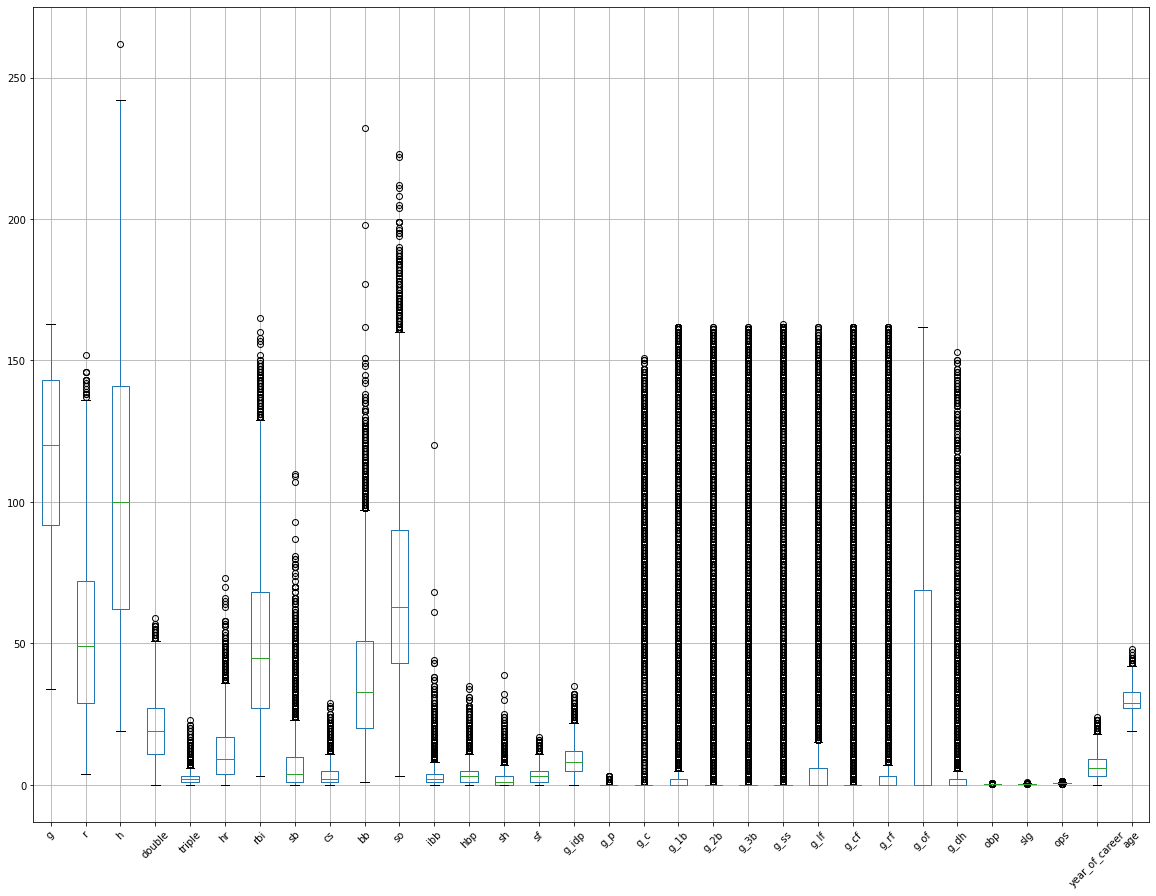

In [129]:
#Check for outliers
df_bp = df.drop(['salary', 'year', 'ab'], axis=1)
df_bp.boxplot(figsize=(20, 15), rot=45)

In [130]:
# Write your dataframe to csv 
save = os.path.join(save_path, 'data', 'Baseball_DW.csv')
df.to_csv(save)